In [6]:
from prepCode import Picker
from obspy import read
%matplotlib inline

# prepCode

prepCode is aimed to mimic real seismic data traces.The code input are synthetic raw \
velocity seismogram (raw data) in $SAC$ foramt. prepCode output converts the raw data \
to Mini-SEED ($MSEED$) format, own stream of integers seismic data, contains all the \
traces, ready to be replay in the Israeli Earthquake Early Warning ($EEW$) algorithm - $EPIC$. \
prepCode uses EPIC minimum velocity amplitude check ($Pv$), for determine the estimated $P$ \
arrival for the station

$P_v = 1e-5.5$  $cm/sec$   $\mathbf{OR}$   $3.16e-8$ $m/sec^2$

### The main code steps
- reading raw data traces, with 67.31 $Hz$ sample rate 
- the raw data is converted to acceleration ($m/sec^2$) and resampled to 40 $Hz$
- first white noise adding, 110$dB$ (relative to acceleration) and 120 $sec$ long
- second white noise adding, before $P$ arrival
- the re-processed seismogram's are multilayered by a gain factor (1e7 default)
- the final prepCode value product is seismic acceleration data traces, with stram of
   integers units (counts).
   

### prepCode initiation

In [7]:
event = Picker(6.5, 10 , 31.4536, 35.7814) # the arguments are mag, depth[km], lat and lon respectivaly
event

< Synthetic earthquake: mag=6.5; depth=10 km; lat=31.4536 deg; lon=35.7814 deg >

In [8]:
event.run() 

#the defaults values are:
#            _amp=3.16e-8,            amplitude chck Pv  - m/sec 
#            _noise_max=1e-6,         upper boundary of the output interval, relative to acc (m/sec**2)
#            _noise_min=-1e-6,        lower boundary of the output interval, relative to acc (m/sec**2)
#            _gain=1e7,               multipication facto - gain
#            _sec=120,                white noise - sec
#            _sample_rate=40          wanted sample rate - Hz


dictionary with essential values in tuple
(lat [deg], lon [deg], dist [km], azi [deg], P_arrival [sec])
with agiven station

In [9]:
event.dict_dist_azi 


{'AFK': (32.83, 35.13, 164.92, 157.96, 19.5),
 'AKAT': (31.55, 34.91, 83.24, 97.08, 13.92),
 'ALMG': (31.79, 35.46, 48.08, 140.72, 6.03),
 'ALMT': (32.71, 35.55, 140.85, 170.9, 16.29),
 'ALN': (32.72, 35.14, 152.95, 156.6, 17.64),
 'AMID': (32.93, 35.54, 164.96, 171.98, 20.0),
 'ARD': (31.25, 35.22, 57.95, 66.89, 15.13),
 'ARIL': (32.1, 35.21, 90.19, 142.95, 8.74),
 'AZGD': (31.07, 35.34, 59.98, 44.42, 17.62),
 'BLGI': (32.73, 35.19, 152.44, 158.43, 17.56),
 'BRSH': (32.32, 35.54, 98.58, 166.72, 9.7),
 'BSHV': (31.26, 34.8, 95.36, 76.96, 18.28),
 'BTNR': (31.65, 34.87, 89.03, 103.85, 13.6),
 'BTOR': (32.73, 35.01, 159.34, 152.44, 18.66),
 'BTSH': (32.5, 35.5, 118.85, 166.9, 12.66),
 'CVYN': (32.6, 35.52, 129.03, 168.84, 14.32),
 'DMNA': (31.04, 35.19, 72.56, 50.44, 18.65),
 'DSHN': (33.08, 35.52, 182.34, 172.15, 22.35),
 'DSI': (31.59, 35.39, 39.97, 112.54, 8.92),
 'EFSH': (31.72, 35.45, 43.06, 133.58, 6.84),
 'EKDM': (31.52, 35.39, 37.72, 101.7, 9.97),
 'ENGV': (32.78, 35.64, 147.84, 

## get information on specific station 

In [20]:
station = 'ALMG'
lat, lon, dist, azi, P_arrival = event.dict_dist_azi.get(station)
def story(lat, lon, dist, azi, P_arrival, station):
    msg = (f'Mw{event.mag} synthetic earthquake, the earthquake epicenter is ' 
           f'{event.depth} km beneath the surface on {event.lat} lat and {event.lon} lon. '
           f'The estimated first P arrival for {station} station ({lat} lat, {lon} lon) '
           f'is {P_arrival} sec from the origin-time. The station back-azimuth is {azi}'
           f' deg and {dist} km away from the epicenter')
    return msg

story(lat, lon, dist, azi, P_arrival, station)

'Mw6.5 synthetic earthquake, the earthquake epicenter is 10 km beneath the surface on 31.4536 lat and 35.7814 lon. The estimated first P arrival for ALMG station (31.79 lat, 35.46 lon) is 6.03 sec from the origin-time. The station back-azimuth is 140.72 deg and 48.08 km away from the epicenter'

### Figures

shows the $P$ arrival point on absolute log raw trace,\
based on the default minimum amplitude check - $Pv$


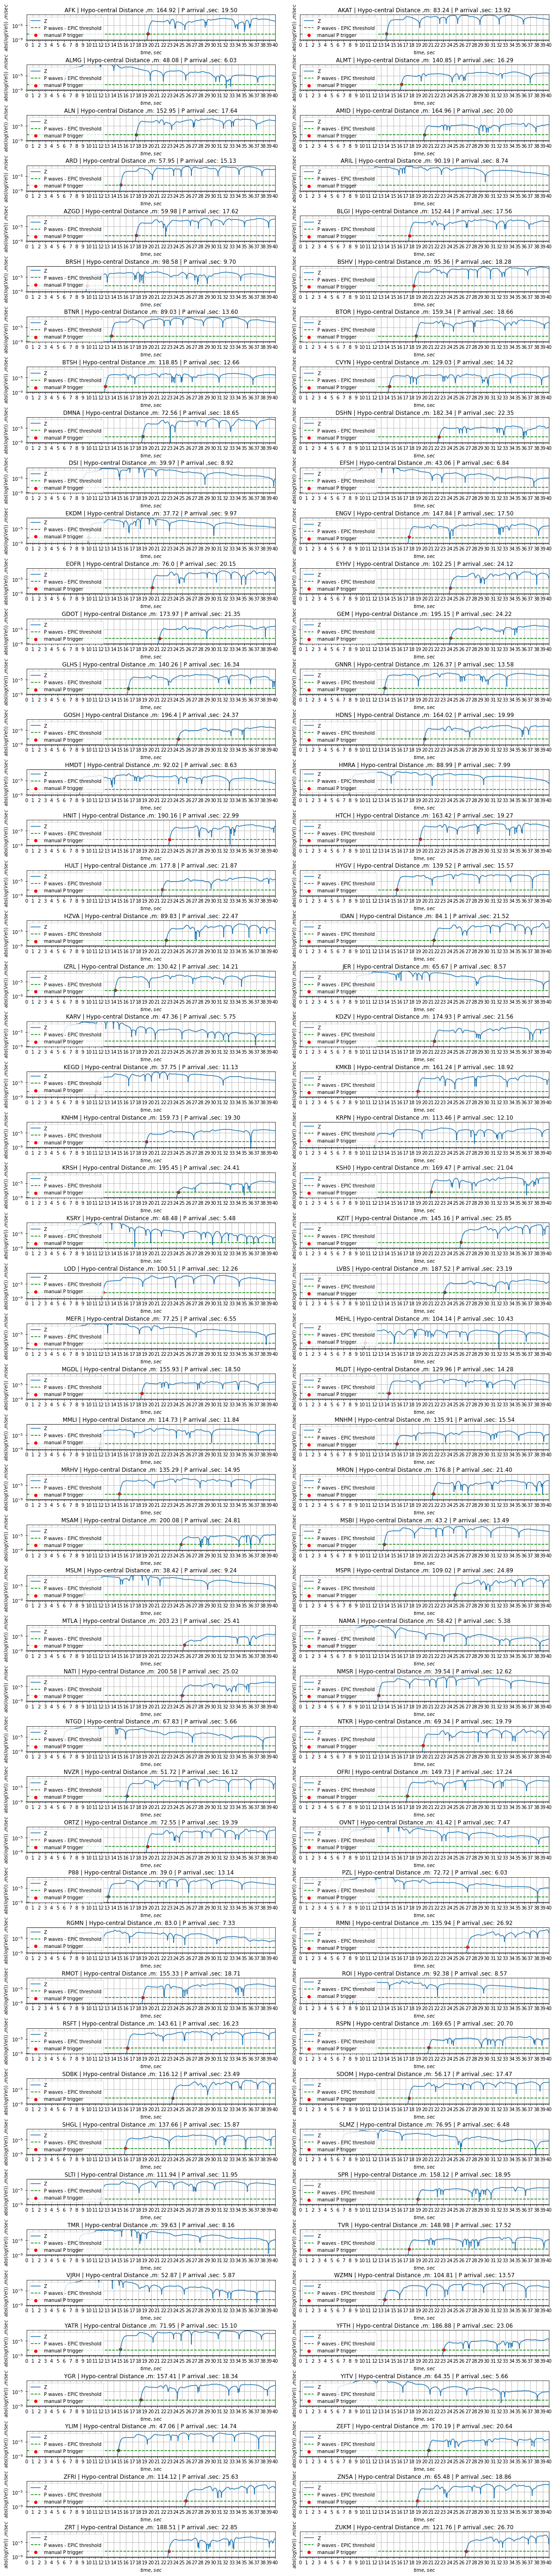

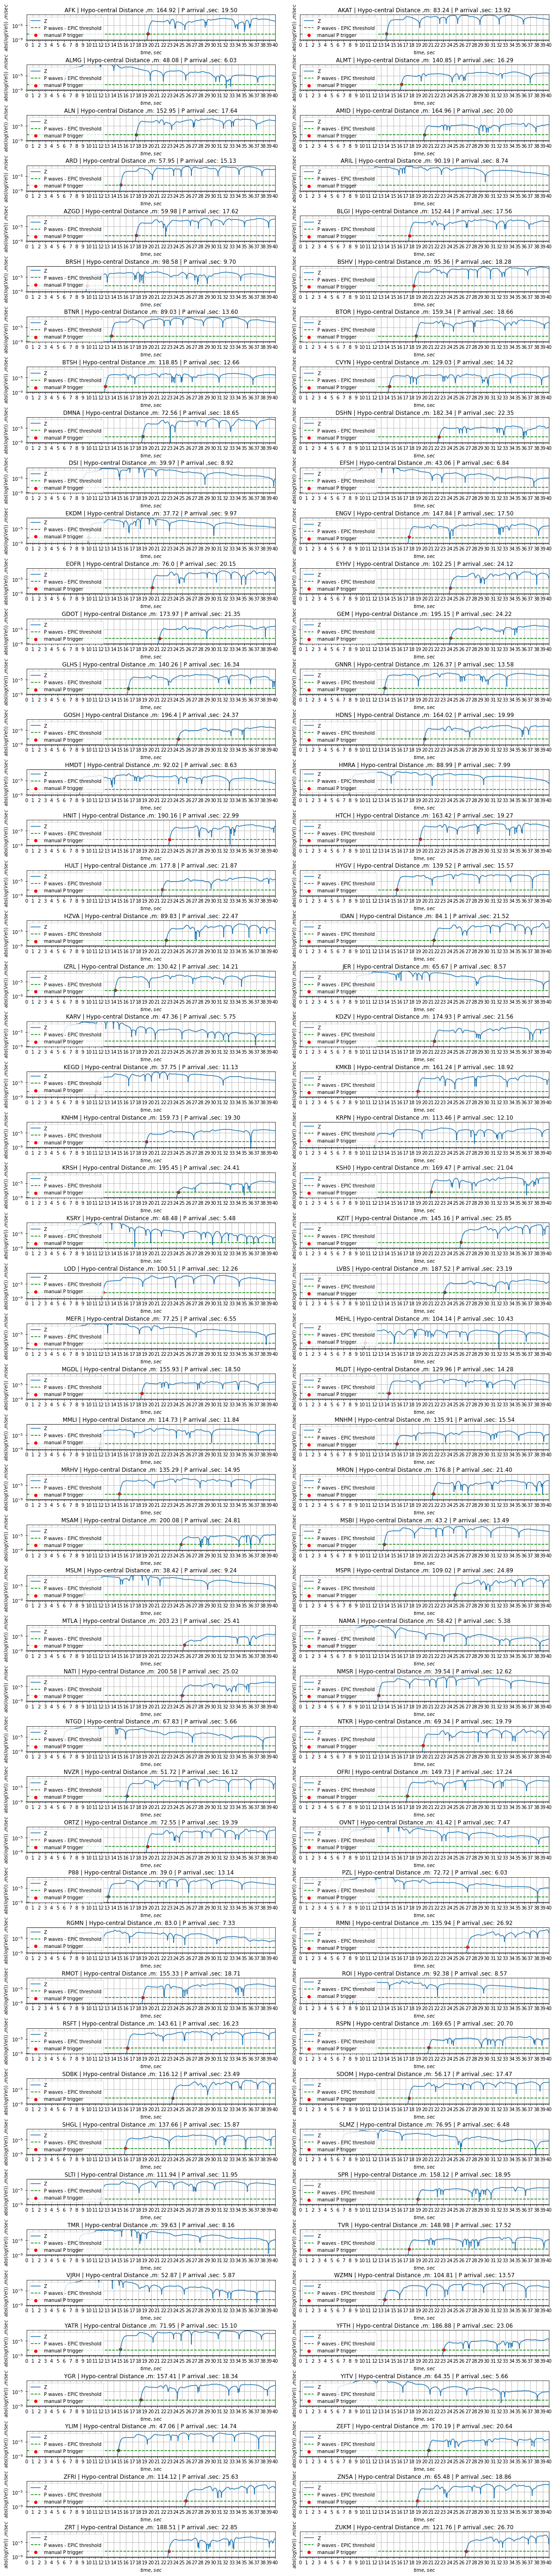

In [7]:
event.picture_arrivals(size=(20,100),         # return: figure, save it if to_sace=True
                   ylim=(1e-9, 1e-2),
                   hspace=1,
                   wspace=.1,
                   to_save=False)


depict the perpetrationCode steps
for one station: 
- a) raw data (vel)
- b) vel gradient (acc) 
- c) 120 sec of white noise
- d) stram of integers (Counts) 

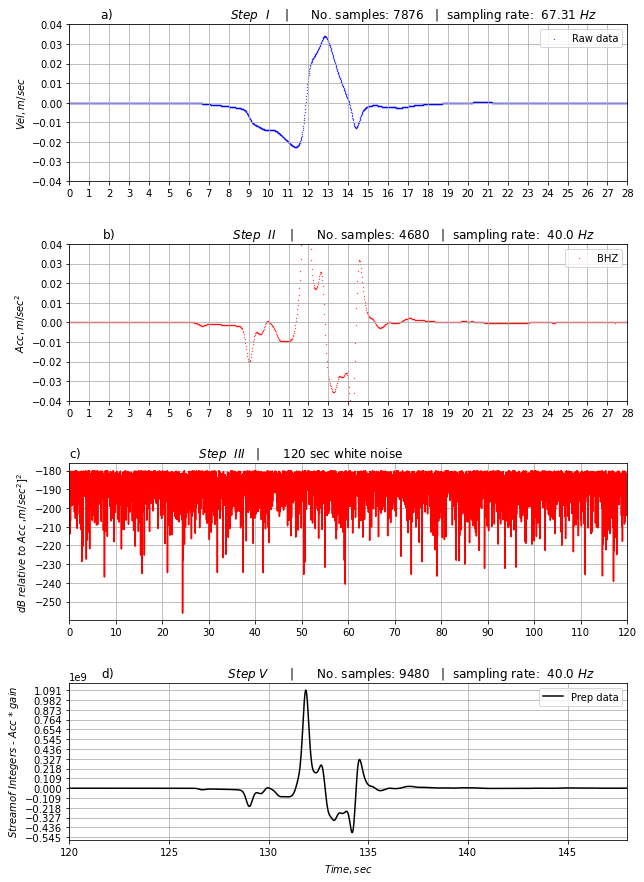

In [6]:
event.picture(station_name='ALMG',
                      ax_xlim=(0, 28),
                      ax_ylim=(-0.04, 0.04),
                      yticks=0.01,
                      xticks=1,
                      size=(10, 15))


### re-processed seismograms to MSEED file

In [14]:
st = read('*.new_*')
st.write(f'Mw{event.eventmag}_{event.depth}km.mseed', 'MSEED')